# Interact with lerepi

In [53]:
import logging
import numpy as np
import matplotlib.pyplot as plt

from lerepi.core.parser import lerepi_parser
from lerepi.core import handler
import abc
import os
import lerepi
import healpy as hp

class parserclass:
    """An abstract element base type for the parser formalism."""
    __metaclass__ = abc.ABCMeta
parser = parserclass()

In [2]:
module_path = os.path.dirname(lerepi.__file__)
parser.resume = ''
parser.config_file = module_path+'/config/cmbs4/c08d.py'

lerepi_handler = handler.handler(parser)
lerepi_handler.collect_jobs()
# lerepi_handler.run()

In [5]:
jobs = lerepi_handler.get_jobs()
job = lerepi_handler.init_job(jobs[0])
# job.qe.dlensalot_model.tpl.

In [22]:
from lenscarf.utils import read_map
from plancklens.qcinv import opfilt_pp

n_inv = read_map(job.qe.dlensalot_model.ninv_p)

In [29]:
import lenscarf.utils_sims as us
filt = opfilt_pp.alm_filter_ninv([n_inv], job.qe.dlensalot_model.transf_blm,
                 marge_qmaps=(), marge_umaps=())
map_trunc = us.ztrunc_sims(job.qe.dlensalot_model.sims, nside=2048, zbounds_list=[(-1,1)])
# filt.apply_map(map_trunc.get_sim_pmap(0))
q,u = map_trunc.get_sim_pmap(0)

In [40]:
mask = job.qe.dlensalot_model.mask
mask = hp.read_map(mask)

In [33]:
q_ninv = filt.n_inv[0] * q
u_ninv = filt.n_inv[0] * u

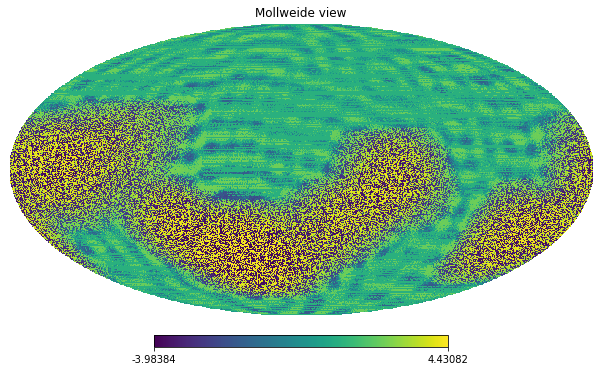

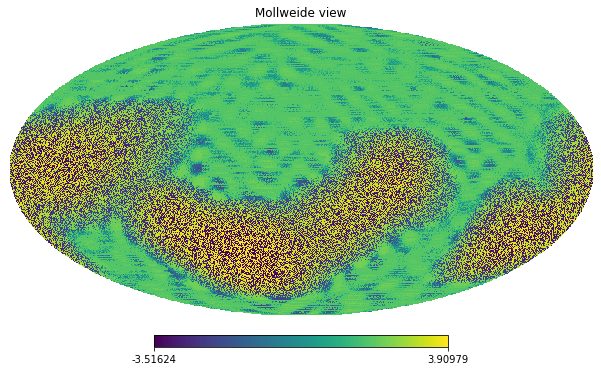

In [41]:
hp.mollview(q*mask, norm='hist')
hp.mollview(u*mask, norm='hist')

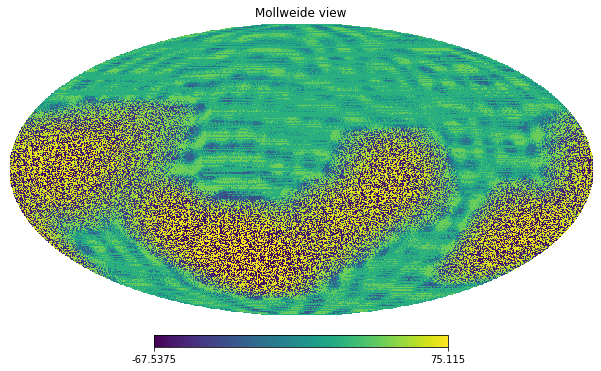

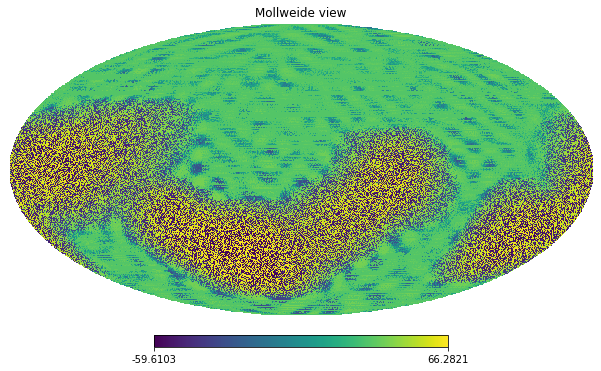

In [45]:
hp.mollview(q_ninv, norm='hist')
hp.mollview(u_ninv, norm='hist')

In [71]:
cl = hp.anafast([np.zeros_like(q),q*mask,u*mask], lmax=512, pol=True)
# cl_ninv = hp.anafast([np.zeros_like(q),q_ninv*mask,u_ninv*mask], lmax=512, pol=True)

In [65]:
cl_ninv_EE = hp.anafast(q_ninv*mask, lmax=512)
cl_ninv_BB = hp.anafast(u_ninv*mask, lmax=512)

cl_EE = hp.anafast(q*mask, lmax=512)
cl_BB = hp.anafast(u*mask, lmax=512)

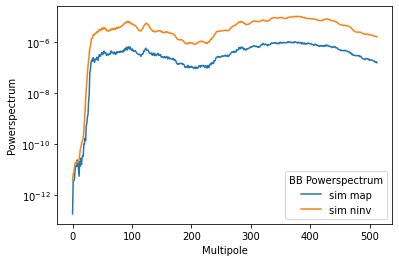

In [72]:
plt.plot(cl_BB, label='sim map')
plt.plot(cl_ninv_BB, label='sim ninv')
plt.legend(title='BB Powerspectrum')
plt.ylabel('Powerspectrum')
plt.xlabel('Multipole')
plt.yscale('log')

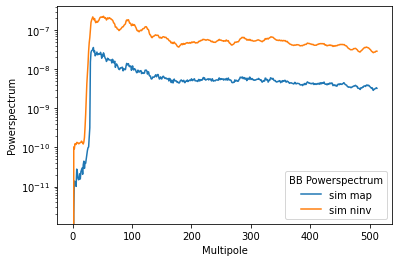

In [73]:
plt.plot(cl[2], label='sim map')
plt.plot(cl_ninv[2], label='sim ninv')
plt.legend(title='BB Powerspectrum')
plt.ylabel('Powerspectrum')
plt.xlabel('Multipole')
plt.yscale('log')

In [7]:
ith = job.get_ith_sim(0)

KeyboardInterrupt: 